# Table of Contents
- [Introduction](#Introduction)
  - [Project Goal](#Project-goal)
  - [Problem Description](#Problem-description)
  - [Scope of Analysis](#Scope-of-analysis)
- [Exploratory Data Analysis (EDA)](#Exploratory-data-analysis-eda)
  - [Libraries](#Libraries)
  - [Load data](#Load-data)
  - [Data overview](#Data-overview)
  - [Time and amount distributions](#Time-and-amount-distributions)
  - [Correlation Analysis](#Correlation-analysis)
  - [Boxplots for each value](#Boxplots-for-each-value)
- [Preprocessing](#Preprocessing)
  - [Standarization](#Standarization)
  - [Removing unnecessary columns](#Removing-unnecessary-columns)
  - [Removing duplicated data](#Removing-duplicated-data)
- [Training](#Training)
  - [Splitting the dataset](#Splitting-the-dataset)
  - [Undersampling](#Undersampling)
  - [Oversampling](#Oversampling)
- [Predicting](#Predicting)








# Introduction

## Project Goal

The goal of this project is to develop a machine learning model capable of detecting fraudulent credit card transactions to minimize financial losses for banks and customers. Fraud detection is crucial because unauthorized transactions can cause significant financial damage and undermine user trust in payment systems.

## Problem Description

The dataset consists of 284,807 transactions, of which only 492 are fraudulent (approximately 0.172% of all transactions). This indicates a severely imbalanced dataset, meaning standard models may struggle to correctly identify fraud cases as they are significantly outnumbered by legitimate transactions.
All features (except for Time and Amount) have been transformed using Principal Component Analysis (PCA). As a result, we do not have access to the raw transaction details, only their principal components (V1 – V28).

## Scope of Analysis

This project will follow these key steps:
- **Exploratory Data Analysis (EDA)** – statistical summary and distribution of transaction features; visualization using boxplots and correlation heatmaps to detect anomalies; identifying class imbalance and skewness in features
- **Data Preprocessing & Feature Engineering** – handling missing values and outliers; scaling and normalizing numerical features where necessary; balancing the dataset using oversampling (SMOTE) and undersampling techniques.
- **Model Training** – testing different classification models (Logistic Regression, Decision Tree)
- **Deployment & Application** - Saving the best model using Joblib (credit_card_model.pkl). Creating a Streamlit web application (credit_card.py) for real-time fraud detection. Ensuring user-friendly interaction where users input transaction features and receive fraud predictions instantly.

# Exploratory Data Analysis (EDA)

## Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import shap

## Load data


In [127]:
df = pd.read_csv('creditcard.csv')


## Data overview

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

 ✔ Great every collumn is numerical so we won't have to strugle with categorical data

In [129]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [130]:
df.shape

(284807, 31)

 Dataset contains 284807 rows and 31 columns.



In [131]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Great - no missing values 

In [132]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Time and amount distributions

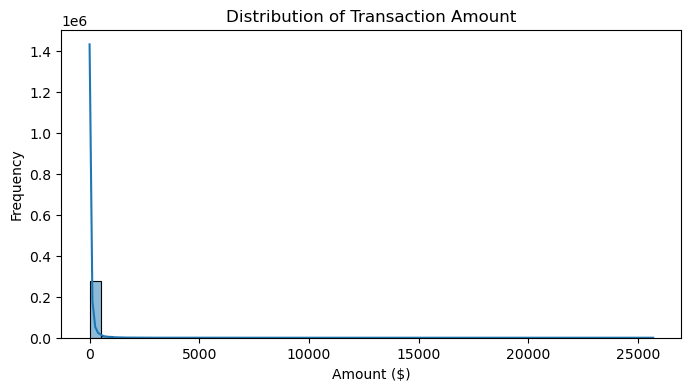

In [133]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

The distribution of transaction amounts is highly skewed to the right, meaning that most transactions have a low amount, while a few have very high values. 

This suggests:
- Most transactions are of small amounts, with a few large transactions acting as potential outliers.
- Due to this skewness, log transformation or scaling might be necessary before feeding this feature into a machine learning model.
- Large transactions do not necessarily indicate fraud, but they might be worth analyzing further.

Let's see this in a logaritmic scale 

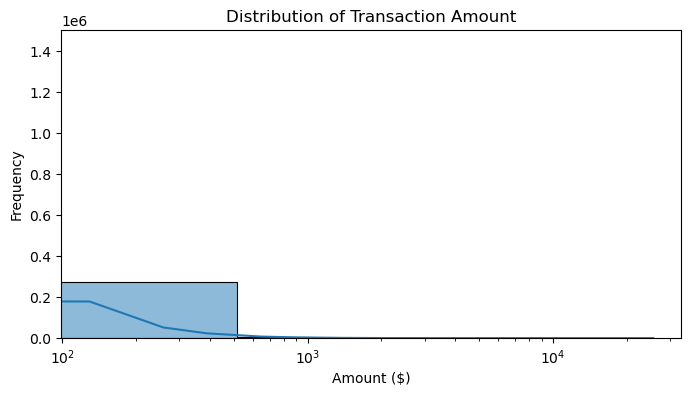

In [134]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.xscale('log')
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

### Correlation Analysis

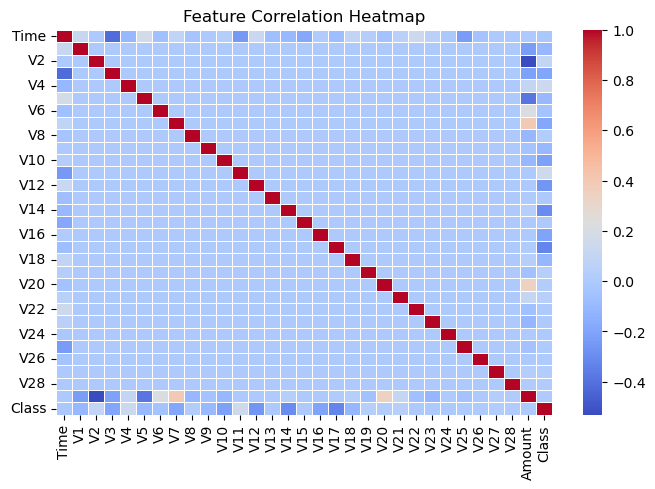

In [135]:

corr_matrix = df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


 The correlation heatmap shows that most features have weak correlations with each other, as indicated by the predominantly blue shades.  
- **Time** exhibits a slight negative correlation with some variables, including **V3** and **V11**, suggesting potential temporal trends.  
- **Transaction Amount** has a noticeable positive correlation with **V7** and **V20**, while it is strongly negatively correlated with **V2**.  
- The **Fraud Indicator (Class)** appears to have weak correlations with most features, but **V14 and V17** show a slight negative correlation, indicating their potential importance in detecting fraudulent transactions.

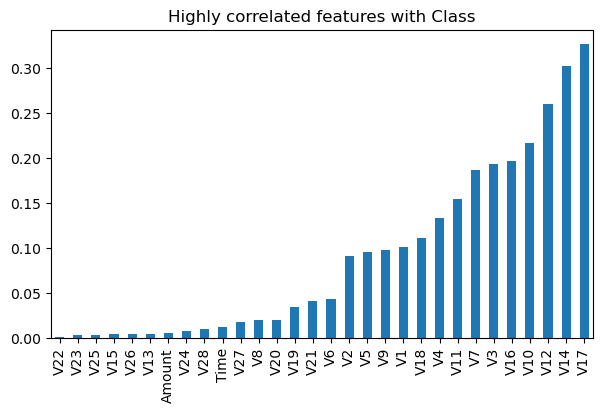

In [136]:


plt.figure(figsize=(7,4))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')


## Boxplots for each value

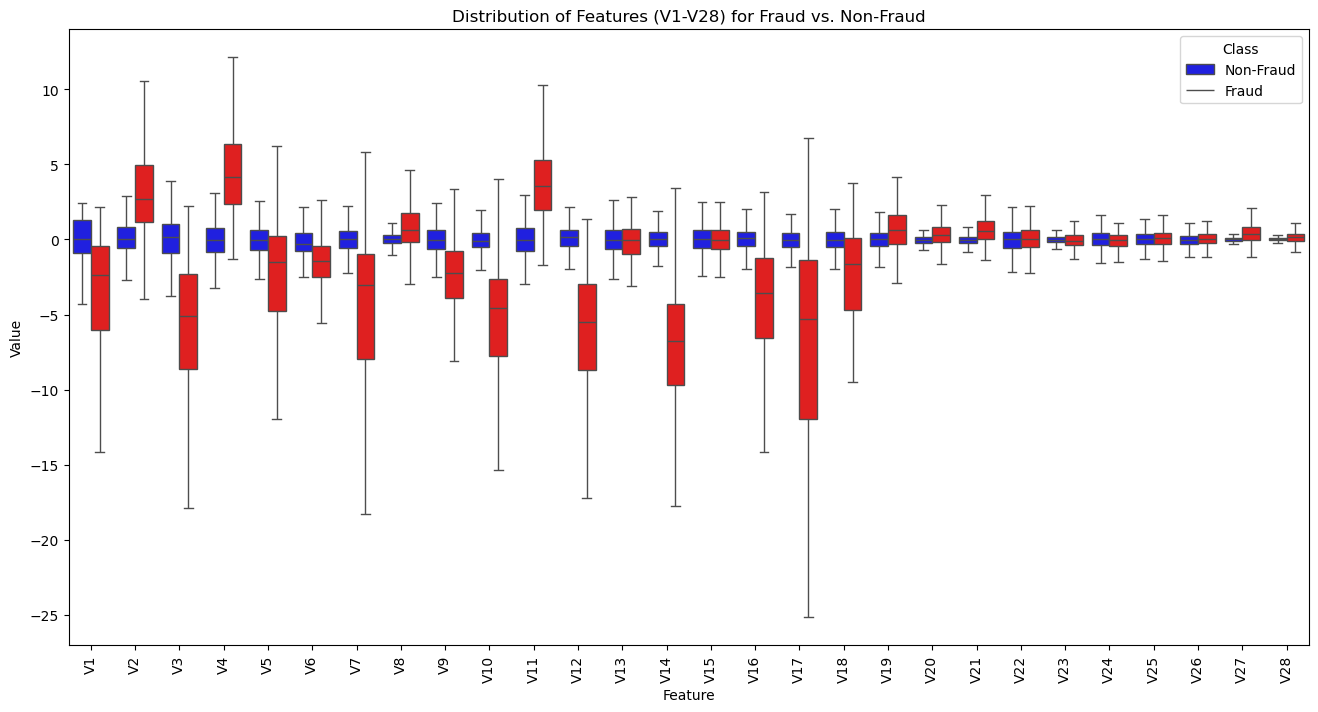

In [137]:
plt.figure(figsize=(16, 8))
selected_columns = [col for col in df.columns if col.startswith('V')]  
df_melted = df.melt(id_vars=["Class"], value_vars=selected_columns) 

sns.boxplot(x="variable", y="value", hue="Class", data=df_melted, palette=["blue", "red"], showfliers=False)
plt.xticks(rotation=90)
plt.title("Distribution of Features (V1-V28) for Fraud vs. Non-Fraud")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(title="Class", labels=["Non-Fraud", "Fraud"])
plt.show()





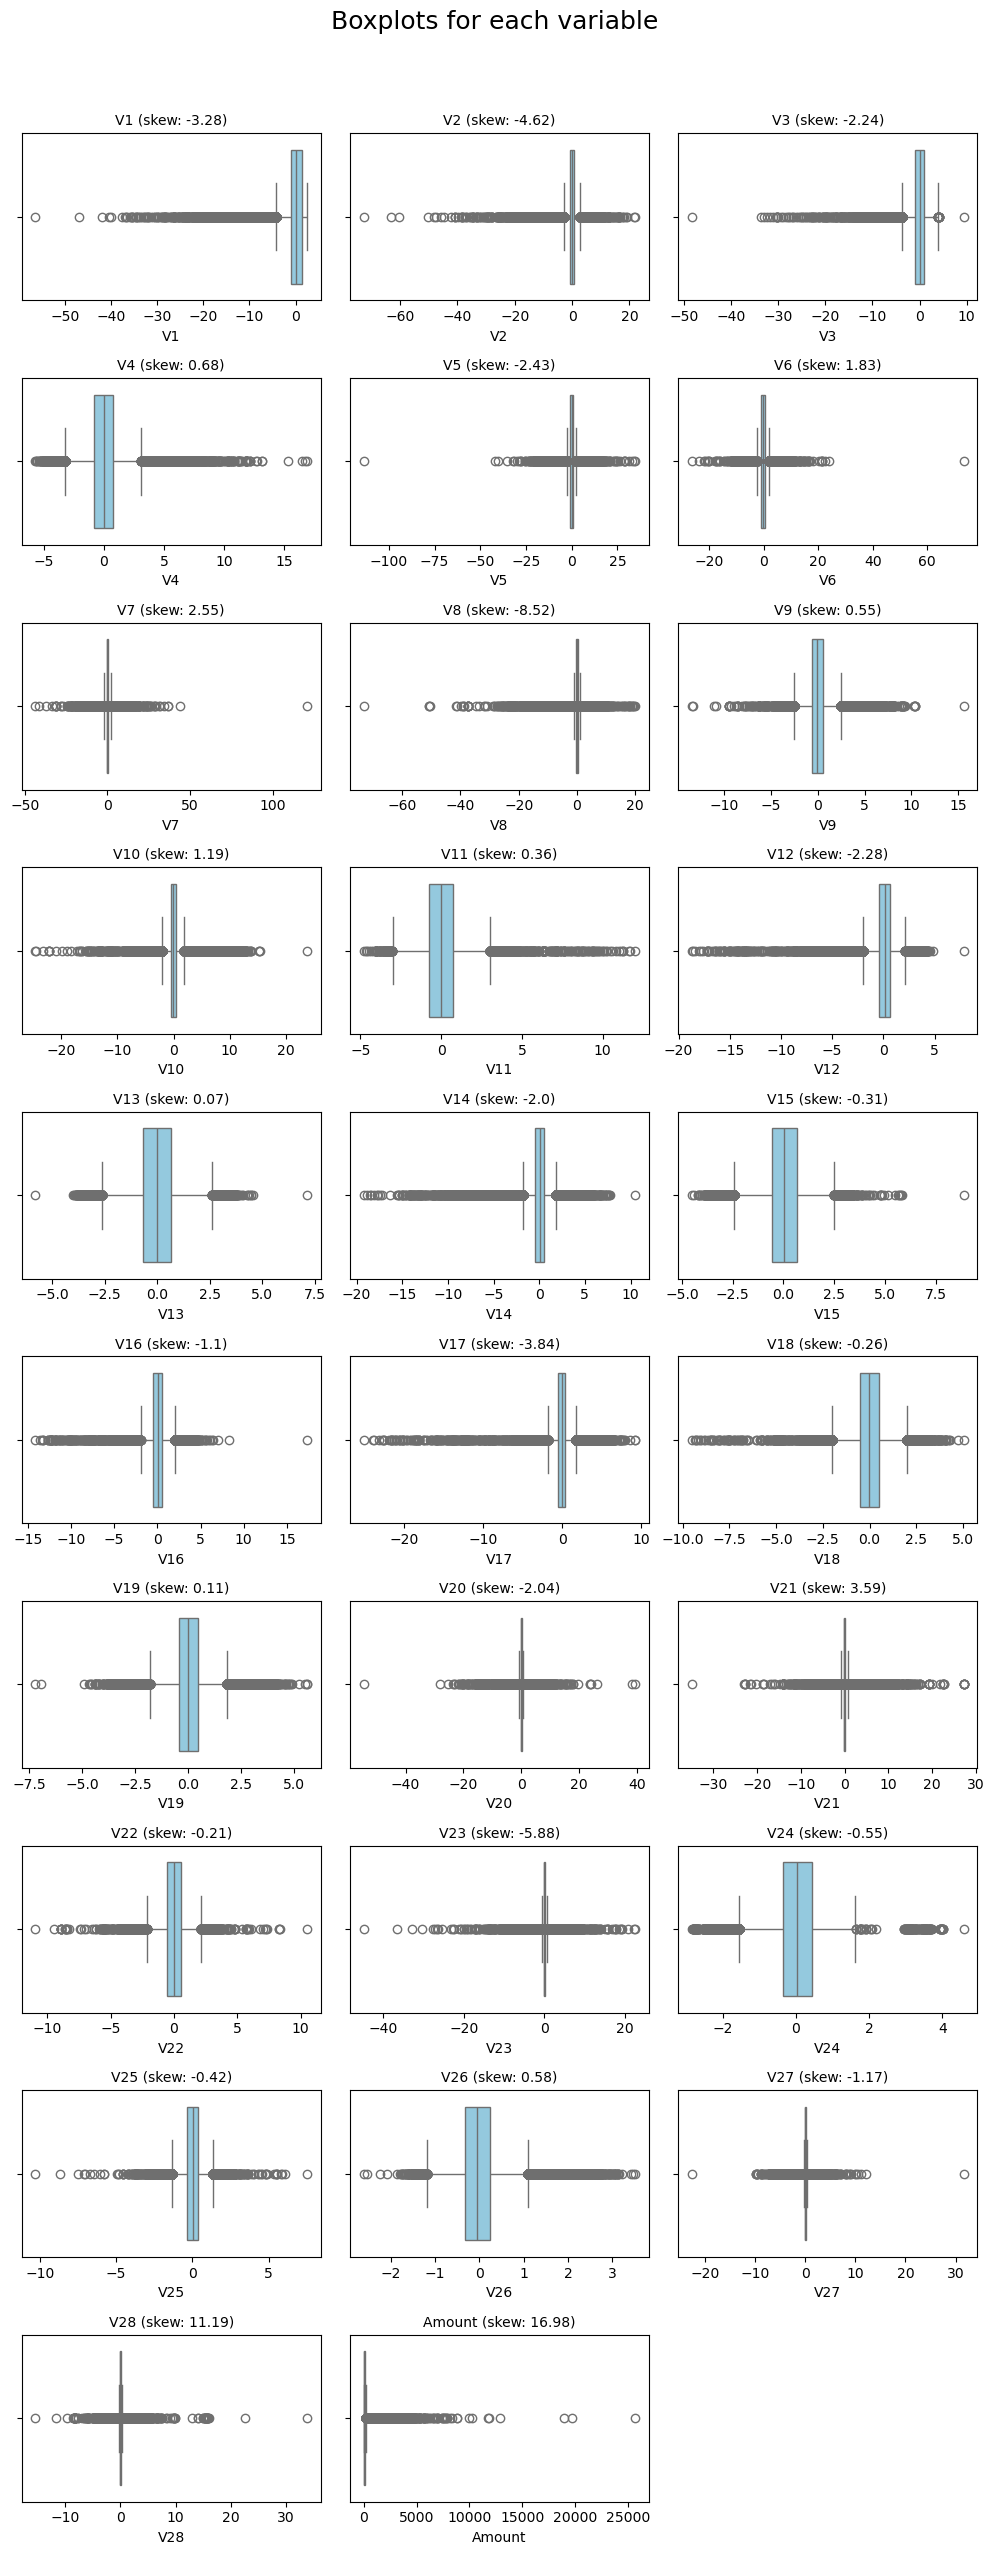

In [138]:
numeric_columns = df.columns[df.columns.get_loc("V1"):df.columns.get_loc("Amount") + 1]

def boxplots_custom(dataset, columns_list, suptitle):
    num_vars = len(columns_list)
    rows = (num_vars // 3) + (num_vars % 3 > 0) 
    cols = min(3, num_vars) 
    
    fig, axs = plt.subplots(rows, cols, figsize=(10, rows * 2.5), sharey=True)
    fig.suptitle(suptitle, y=1.02, fontsize=18)
    
    axs = axs.flatten() if num_vars > 1 else [axs]  
    
    for i, col in enumerate(columns_list):
        sns.boxplot(data=dataset[col], orient='h', ax=axs[i], color="skyblue")
        skewness = round(dataset[col].skew(), 2)
        axs[i].set_title(f"{col} (skew: {skewness})", fontsize=10)

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

boxplots_custom(df, numeric_columns, "Boxplots for each variable")


# Preprocessing

## Standarization

In [139]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))


## Removing unnecessary columns

In [140]:
df = df.drop(['Time'], axis= 1)

## Removing duplicated data

In [141]:
df.duplicated().any()

True

In [142]:
df = df.drop_duplicates()
df.shape

(275663, 30)

In [143]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [144]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

We definitly have an inbalance dataset

# Training

## Splitting the dataset

In [145]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [147]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),    
}

results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.999256   0.890625  0.626374  0.735484
1        Decision Tree  0.998912   0.644860  0.758242  0.696970


- Logistic Regression performs better in reducing false alarms (higher precision) but may miss some fraud cases (lower recall).
- Decision Tree detects more fraud cases (higher recall) but is more likely to misclassify normal transactions as fraud (lower precision).

## Undersampling

In [148]:
normal = df[df['Class']== 0]
fraud = df[df['Class']== 1]

In [149]:
normal_sample = normal.sample(n = 473)
normal_sample.shape

(473, 30)

In [150]:
underDF = pd.concat([normal_sample, fraud], ignore_index=True)
underDF.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.436030,1.635475,1.647855,2.468624,0.625894,0.347932,0.825010,-0.188491,-1.207540,1.338080,...,-0.321424,-0.544905,-0.144442,-0.474564,-0.241057,-0.015167,0.330356,0.035417,-0.326162,0
1,2.105486,-1.019027,-1.535146,-1.412367,-0.528119,-0.868929,-0.249172,-0.289534,0.052543,0.381887,...,-0.586163,-1.185989,0.344688,0.666158,-0.335011,0.412323,-0.072693,-0.048000,-0.101470,0
2,0.444929,1.856608,-2.287247,1.532982,0.829166,-1.415018,0.485207,0.325277,-0.714584,-1.238946,...,-0.076531,-0.147406,0.094579,-0.357427,-0.429503,-0.394639,0.124903,-0.061056,-0.331280,0
3,2.064739,0.181190,-1.685832,0.411581,0.473593,-0.799671,0.200618,-0.236605,0.425909,-0.399306,...,-0.352238,-0.881568,0.344283,0.520293,-0.261830,0.173874,-0.056694,-0.029846,-0.346073,0
4,-1.946421,-1.828510,-0.161578,0.346695,-2.017419,2.409650,2.892151,-0.207424,1.712204,-1.613049,...,0.294661,1.243455,0.877862,-0.999748,-0.920497,-0.236134,0.393970,0.245880,3.202429,0


In [151]:
X = underDF.drop('Class', axis = 1)
y = underDF['Class']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [153]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),    
}

results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.936842   0.968750  0.911765  0.939394
1        Decision Tree  0.942105   0.941748  0.950980  0.946341


## Oversampling

In [154]:
X = df.drop('Class', axis = 1)
y = df['Class']
y.shape

(275663,)

In [155]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [156]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [158]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),    
}

results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.943902   0.972499  0.913568  0.942113
1        Decision Tree  0.997956   0.997006  0.998909  0.997957


In [159]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [160]:
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [161]:
model = joblib.load("credit_card_model.pkl")

# Predicting

In [162]:
import warnings
warnings.simplefilter("ignore")
prediction = model.predict([[-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0]])

In [163]:
prediction[0]

1

In [164]:
if prediction[0] == 0:
    print("Normal transaction")
else :
    print("Fraud!")

Fraud!
